In [89]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [90]:
from sklearn.datasets import load_iris
iris = load_iris()
cols = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data , columns = cols)
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , random_state = 0 , max_iter = 300)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [92]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [93]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [94]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

In [95]:
iris_result = iris_df.groupby(['target' , 'cluster']).size()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


<Axes: xlabel='pca_x', ylabel='pca_y'>

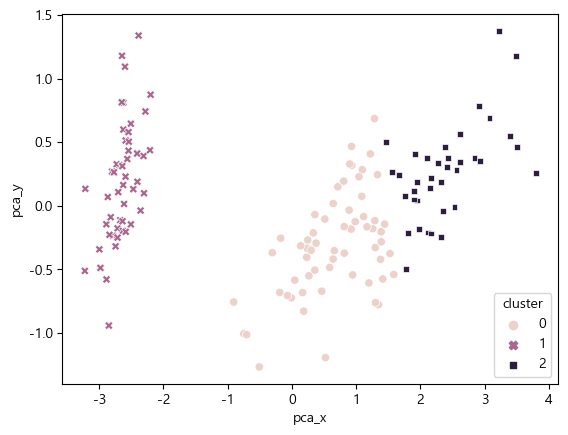

In [97]:
sns.scatterplot(x = 'pca_x' , y = 'pca_y' , data = iris_df , hue = 'cluster' , style = 'cluster')

In [98]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [99]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [100]:
pred = kmeans.predict(iris_df.iloc[:,:4])

In [101]:
len(pred)

150

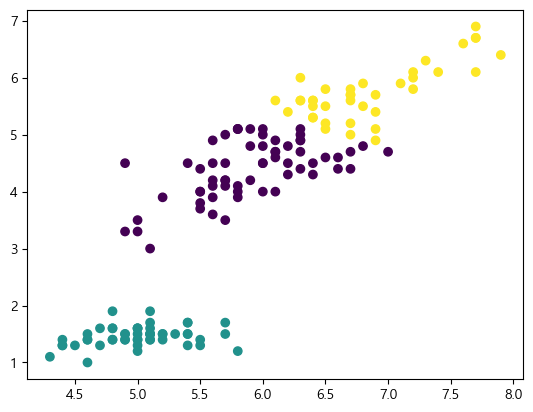

In [102]:
plt.scatter(x= iris_df['sepal_length'] , y = iris_df['petal_length'] , c = pred)
plt.show()

In [103]:
#군집별 중앙값 출력

centers = kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

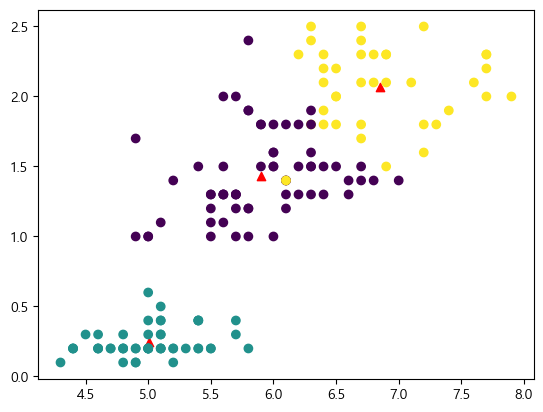

In [104]:
plt.scatter(x = centers[:,0] , y = centers[:,3] , marker = '^' , c = 'r')
plt.scatter(x= iris_df['sepal_length'] , y = iris_df['petal_width'] , c = pred)
plt.show()

In [105]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

# 데이터프레임으로 변형

In [120]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data , columns = columns)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [107]:
from scipy.cluster.hierarchy import linkage , dendrogram
clusters_single = linkage(y = data , method = 'single' , metric = 'euclidean')
clusters_complete = linkage(y = data , method = 'complete' , metric = 'euclidean')
clusters_average = linkage(y = data , method = 'average' , metric = 'euclidean')

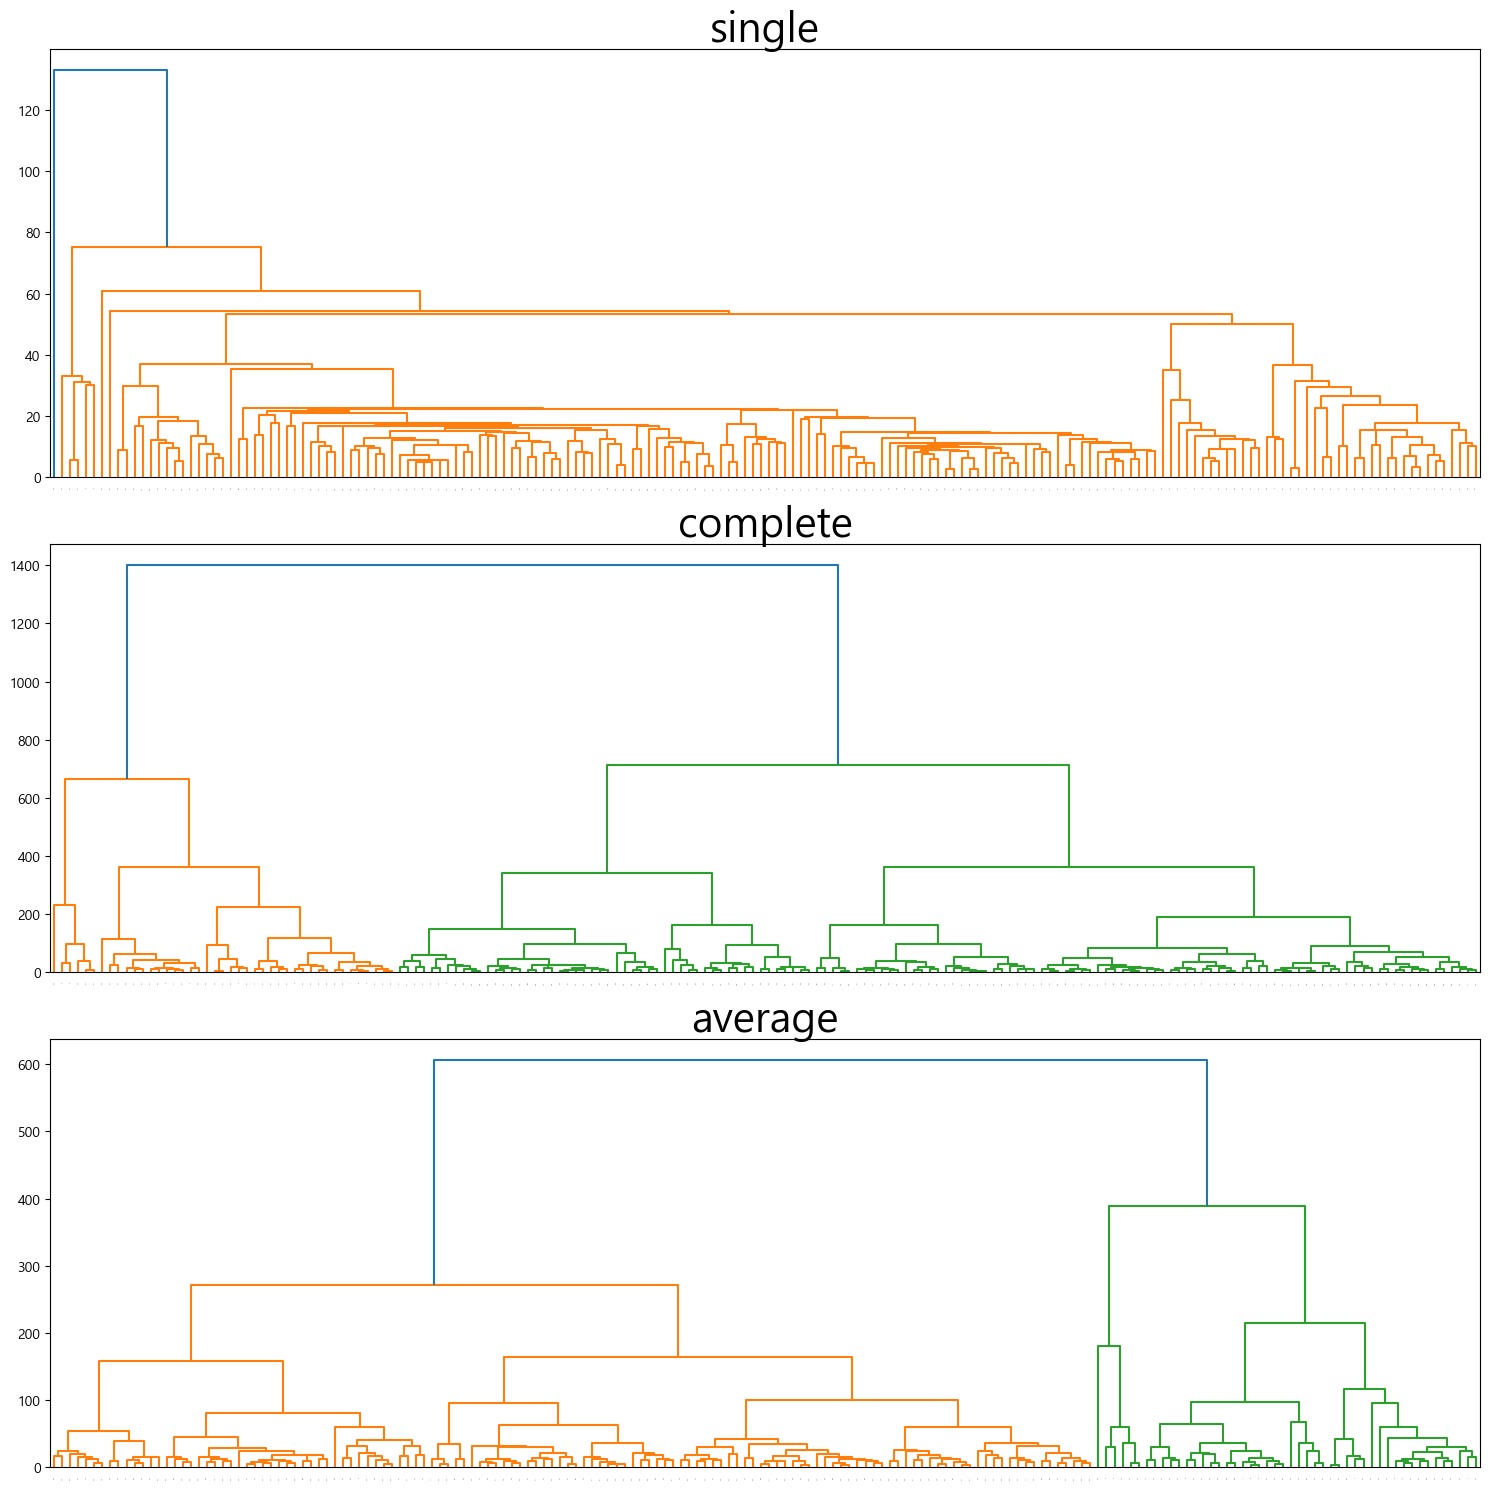

In [108]:
fig , axes = plt.subplots(3,1)
fig.set_size_inches(15,15)
plt.subplot(3,1,1)
dendrogram(clusters_single , leaf_font_size = 0)
plt.title('single' , fontsize = 30)
plt.subplot(3,1,2)
dendrogram(clusters_complete , leaf_font_size = 0)
plt.title('complete' , fontsize = 30)
plt.subplot(3,1,3)
dendrogram(clusters_average , leaf_font_size = 0)
plt.title('average' , fontsize = 30)

plt.tight_layout()
plt.show()

In [109]:
# single은 안된다. , complete 나 average로 , 군집은 3 or 4개로 묶는 것이 좋아보임

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [111]:
ss = StandardScaler()

df.loc[:,:] = ss.fit_transform(data)

In [112]:
df.describe().loc[['mean','std']].T

,mean,std
alcohol,7.943708e-15,1.002821
malic_acid,3.592632e-16,1.002821
ash,-4.066660e-15,1.002821
alcalinity_of_ash,-7.983626e-17,1.002821
magnesium,-7.983626e-17,1.002821
total_phenols,-3.991813e-17,1.002821
flavanoids,9.979533e-16,1.002821
nonflavanoid_phenols,-5.588538e-16,1.002821
proanthocyanins,-1.656602e-15,1.002821
color_intensity,-3.442939e-16,1.002821


In [141]:
pca = PCA(n_components = 2)

data = pca.fit_transform(data)
data.shape

(178, 2)

In [142]:
#변동률
pca.explained_variance_ratio_

array([0.42537778, 0.22570994])

In [143]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4 , init = 'k-means++' , max_iter = 300)

In [144]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [145]:
kmeans.labels_

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

- n_components 의 매개변수 값에 따라 두 가지 동작을 수행
- 1보다 크면 해당 개수만큼 특성이 반환됨
- 변동비율 95%나 97%를 원한다면 , n_components = 0.95 , 0.97을 담을 수 있음.
- whiten = True로 지정하면 각 주성분의 값을 평균 0 , 분산 1이 되도록 반환

In [146]:
df['pca_x'] = data[:,0]
df['pca_y'] = data[:,1]

In [147]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-3.370524,-2.216289,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-2.601956,-1.757229,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,-2.677839,-2.760899,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-2.387017,-2.297347,0


## K-means로 클러스터 찾기

In [148]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4 , random_state = 200)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=200)

In [149]:
cluster = kmeans.labels_
cluster

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [150]:
df['cluster'] = cluster

In [151]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,3
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,0


<Axes: xlabel='pca_x', ylabel='pca_y'>

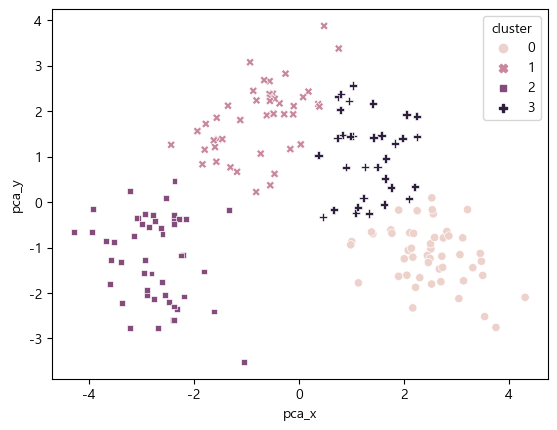

In [152]:
sns.scatterplot(x = 'pca_x' , y = 'pca_y' , data = df , hue = 'cluster' , style = 'cluster')

In [153]:
centers = kmeans.cluster_centers_
centers

array([[ 2.48729268, -1.17443641],
       [-0.72924237,  1.81521086],
       [-2.74392982, -1.2141906 ],
       [ 1.32221443,  1.05204426]])

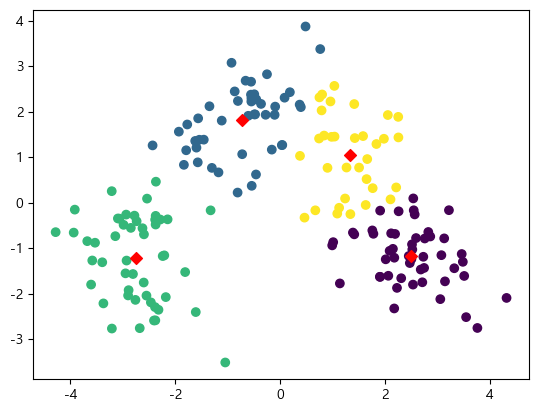

In [155]:
plt.scatter(df['pca_x'] , df['pca_y'] , c = df['cluster'])
plt.scatter(centers[:,0] , centers[:,1], c = 'red' , marker = 'D')

## 최적의 K 찾기
- k-means 알고리즘의 단점 중 하나는 클러스터의 개수를 사전에 지정해야 한다는 점이다.
- 군집 알고리즘에서 적절한 k를 찾기 위한 완벽한 방법은 없다.
- 대표적인 방법중 하나가 엘보우 방법

- 엘보우 방법
 - k-means 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 알 수 있다.
 - 이 거리의 제곱의 합을 inertia라고 부른다.
 - inertia : 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값
 
 - 클러스터(cluster) : 비슷한 특성을 가진 데이터들끼리 묶는 것
 - 클러스터링(clustering) : 데이터들을 군집으로 묶어주는 작업
 - 중심점 , 도심(centroid) : 클러스터의 중심
 - 클러스터의 개수를 증가시키면서 이너셔를 시각화하면 감소하는 속도가 꺾이는 지점이 있다. 이 이점부터 클러스터의 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 변화되지 않는다. 즉 이너셔가 크게 줄어들지 않는다. 이 이점에 팔꿈치 모양과 같아서 엘보우 방법이라 부른다.
 

In [158]:
inertia = []

for k in range(2,16):
    km = KMeans(n_clusters = k , random_state = 200)
    km.fit(data)
    iner = km.inertia_
    inertia.append(iner)
    
    print('군집수 : ' , k , ' ' , '이너셔 : ' , iner)

군집수 :  2   이너셔 :  628.7883507554773
군집수 :  3   이너셔 :  259.50938075119336
군집수 :  4   이너셔 :  192.39061530234852
군집수 :  5   이너셔 :  155.23377125133072
군집수 :  6   이너셔 :  122.79170642463963
군집수 :  7   이너셔 :  99.38807143831706
군집수 :  8   이너셔 :  89.2248435933517
군집수 :  9   이너셔 :  81.43960572253788
군집수 :  10   이너셔 :  73.87292967354205
군집수 :  11   이너셔 :  65.77604176180179
군집수 :  12   이너셔 :  58.674626958097534
군집수 :  13   이너셔 :  54.35443305484969
군집수 :  14   이너셔 :  50.530018826760546
군집수 :  15   이너셔 :  47.19456672094383


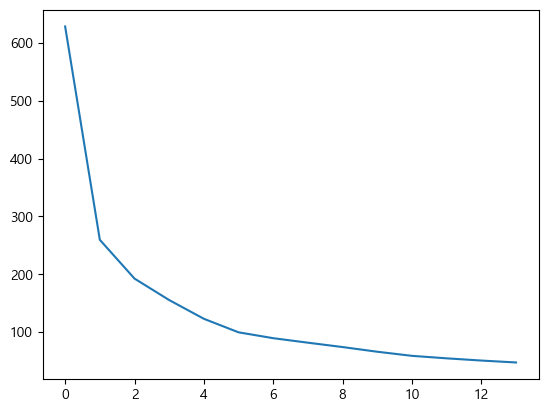

In [159]:
plt.plot(inertia)